<a href="https://colab.research.google.com/github/seongheek/econtheory/blob/main/5%EC%A3%BC%EC%B0%A8_%EA%B0%95%EC%9D%98_%EC%A3%BC%EC%8B%9D%EC%A2%85%EB%AA%A9_%EC%83%81%EC%9E%90%EA%B7%B8%EB%A6%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **코스피 시총 5대 기업의 수익률 엑셀파일 불러오기**
2024년 말 기준 코스피 시총 5위 기업의 최근 1년 일일 수익률을 나타낸 데이터를 업로드해보자.

(http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201 에서 주식-> 개별주식 시세추이)

**먼저 글씨깨짐 방지를 위해 폰트를 설치하자.**

In [69]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
#런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

**업로드한 파일을 불러오자.**

In [2]:
import pandas as pd

df=pd.read_excel('kospi_2024.xlsx', index_col=1)

In [3]:
df

,일자,수익률
종목,,
삼성전자,2025/04/02,0.17
삼성전자,2025/04/01,1.73
삼성전자,2025/03/31,-3.99
삼성전자,2025/03/28,-2.59
삼성전자,2025/03/27,0.65
...,...,...
코스피,2024/04/08,0.13
코스피,2024/04/05,-1.01
코스피,2024/04/04,1.29


In [4]:
#각 변수의 성격을 파악해보자 - 객체 (Objects)는 파이썬이 데이터(data)를 추상화한 것, 실수(Floating-point number)는 소수점이 있는 숫자
df.dtypes

,0
일자,object
수익률,float64


In [5]:
#기초통계량 뽑기 - 숫자만 가능
df.describe()

,수익률
count,1452.000000
mean,-0.002617
std,2.350767
min,-12.090000
25%,-1.240000
50%,-0.035000
75%,1.170000
max,9.840000


**종목별 수익률 상자그림을 그려보자.**

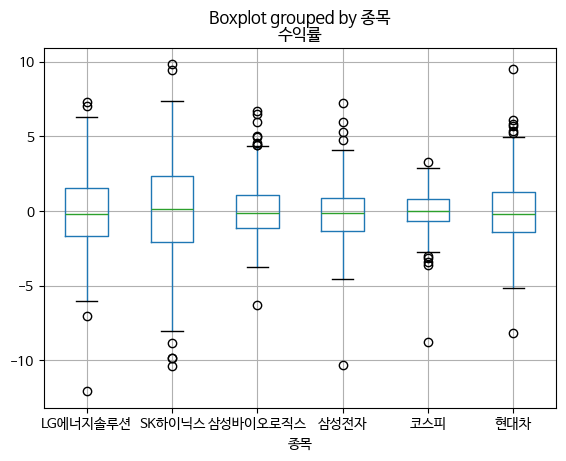

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

#종목별 상자그림
myplot=df.boxplot(column=['수익률'],by='종목')
plt.show()

제목과 축 제목, 종목 순서를 정리하여 그래프를 깔끔하게 그려보자.

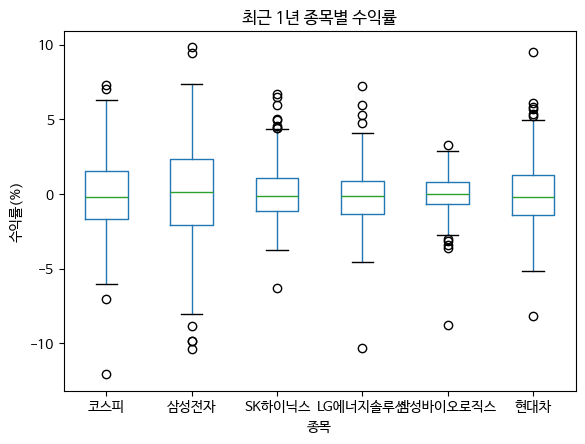

In [7]:
import matplotlib.pyplot as plt
import pandas as pd


# 원하는 종목 순서를 리스트로 정의
custom_order = ['코스피', '삼성전자', 'SK하이닉스', 'LG에너지솔루션', '삼성바이오로직스', '현대차']

myplot=df.boxplot(column=['수익률'],by='종목', positions=range(len(custom_order)), grid=False)  # grid를 False로 설정하여 선 제거

plt.xticks(range(len(custom_order)), custom_order)
# 기본 제목 제거
plt.suptitle("")  # suptitle을 빈 문자열로 설정하여 기본 제목 제거
plt.xlabel('종목')
plt.ylabel('수익률(%)')
plt.title('최근 1년 종목별 수익률')
plt.show()

**SNS(seaborn) 패키지로도 상자그림을 그릴 수 있다. (글짜깨짐 때문에 편의상 영어로 변수명을 바꾸어주자)**

In [8]:
# 패키지 불러오기
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

In [9]:
# 화면 스타일 설정하기

sns.set_style("whitegrid")

In [10]:
#인덱스 명 바꾸기
df = df.rename_axis(index="Stock")
# 딕셔너리 명칭 바꾸기
stock_name_mapping = {
    '삼성전자': 'Samsung Electronics',
    'SK하이닉스': 'SK Hynix',
    '코스피': 'KOSPI',
    'LG에너지솔루션': 'LG Energy Solutions',
    '삼성바이오로직스': 'Samsung Biologics',
    '현대차': 'Hyundai Automobile'
}

# 영문 종목명으로 바꾸기
df = df.set_index(df.index.map(stock_name_mapping))

df

,일자,수익률
Stock,,
Samsung Electronics,2025/04/02,0.17
Samsung Electronics,2025/04/01,1.73
Samsung Electronics,2025/03/31,-3.99
Samsung Electronics,2025/03/28,-2.59
Samsung Electronics,2025/03/27,0.65
...,...,...
KOSPI,2024/04/08,0.13
KOSPI,2024/04/05,-1.01
KOSPI,2024/04/04,1.29


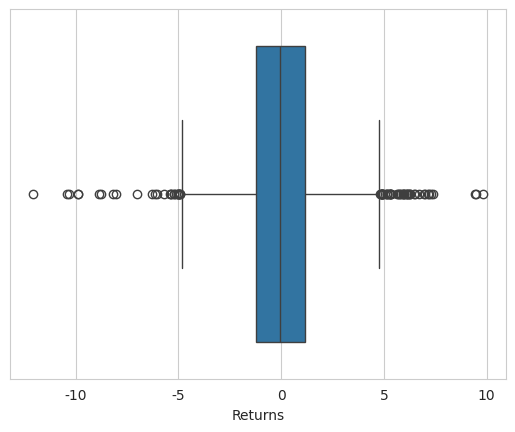

In [11]:
# 변수명 영어로 바꾸기
df.columns=['Date','Returns']

# 상자그림 : 가로 방향
sns.boxplot(x = 'Returns',  data = df)
plt.show()

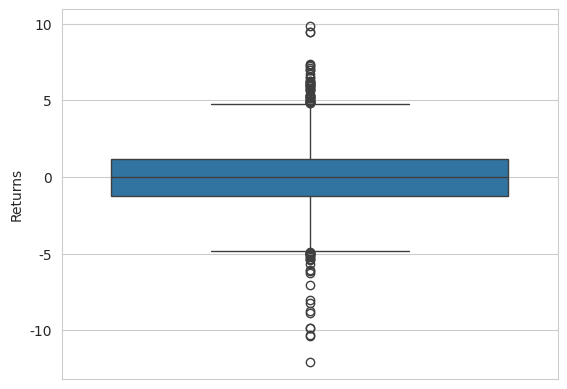

In [12]:
#세로 방향
sns.boxplot(y = 'Returns', orient = 'v', data = df)
plt.show()

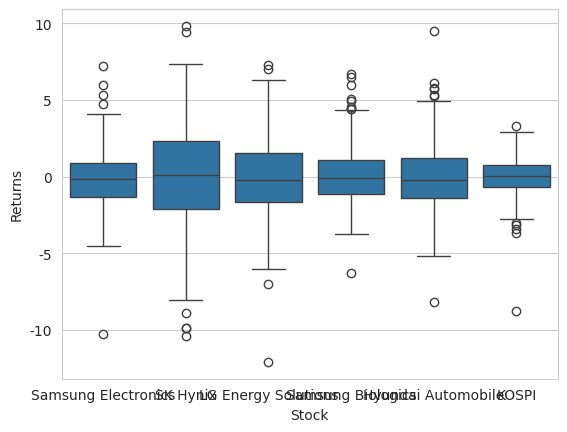

In [13]:
sns.boxplot(x = 'Stock', y = 'Returns', data = df)

plt.show()

**종목명이 겹치니 교정해주자.**




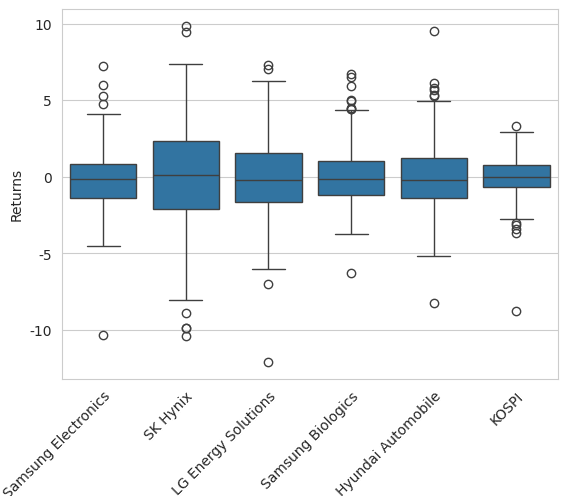

In [14]:
sns.boxplot(x = 'Stock', y = 'Returns', data = df)
plt.xticks(rotation=45, ha='right', wrap=True)
plt.show()

**코스피를 가장 먼저 오게 교정하고, 종목별 색상을 다르게 하여 상자그림을 그려보자.**

*Seaborn 옵션에 색상 팔레트 설정 (palette='팔레트명') 추가

(https://seaborn.pydata.org/tutorial/color_palettes.html)

In [15]:
custom_index_order = ['KOSPI', 'Samsung Electronics', 'SK Hynix', 'LG Energy Solutions', 'Samsung Biologics', 'Hyundai Automobile']

df = df.loc[custom_index_order]  # 지정한 순서대로 정렬

<ipython-input-16-328533e0de4c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Stock', y = 'Returns', data = df, palette='pastel')


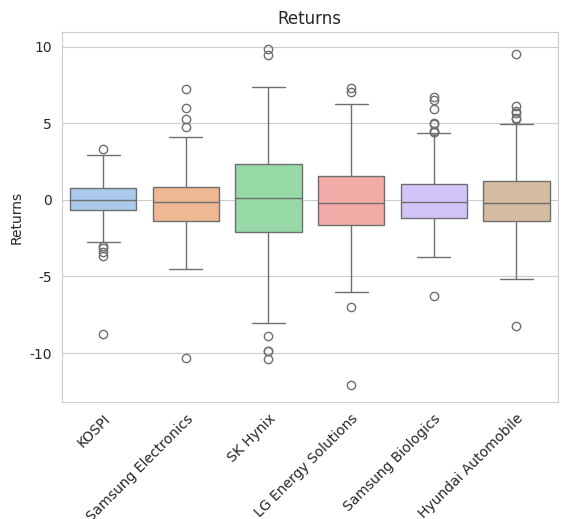

In [16]:
sns.boxplot(x = 'Stock', y = 'Returns', data = df, palette='pastel')
plt.xticks(rotation=45, ha='right', wrap=True)
plt.title('Returns')
plt.show()

**이제 날짜 데이터를 다뤄보자.**

In [17]:
#object 속성의 '일자' 변수를 날짜 속성으로 바꾸어보자.
df['Date']=pd.to_datetime(df['Date'])
df['Date']

,Date
Stock,
KOSPI,2025-04-02
KOSPI,2025-04-01
KOSPI,2025-03-31
KOSPI,2025-03-28
KOSPI,2025-03-27
...,...
Hyundai Automobile,2024-04-08
Hyundai Automobile,2024-04-05
Hyundai Automobile,2024-04-04


In [18]:
# 2024년 6월 데이터만 추출
june_2024_data = df[(df['Date'].dt.year == 2024) & (df['Date'].dt.month == 6)]

# 추출된 데이터 출력
print(june_2024_data)

                         Date  Returns
Stock                                 
KOSPI              2024-06-28     0.49
KOSPI              2024-06-27    -0.29
KOSPI              2024-06-26     0.64
KOSPI              2024-06-25     0.35
KOSPI              2024-06-24    -0.70
...                       ...      ...
Hyundai Automobile 2024-06-10     0.94
Hyundai Automobile 2024-06-07     0.38
Hyundai Automobile 2024-06-05     1.93
Hyundai Automobile 2024-06-04    -2.26
Hyundai Automobile 2024-06-03     4.74

[114 rows x 2 columns]


In [19]:
# 2024년 4분기 데이터만 추출
q4_2024_data = df[(df['Date'].dt.year == 2024) & (df['Date'].dt.month >= 10) & (df['Date'].dt.month <= 12)]

# 추출된 데이터 출력
print(q4_2024_data)

                         Date  Returns
Stock                                 
KOSPI              2024-12-30    -0.22
KOSPI              2024-12-27    -1.02
KOSPI              2024-12-26    -0.44
KOSPI              2024-12-24    -0.06
KOSPI              2024-12-23     1.57
...                       ...      ...
Hyundai Automobile 2024-10-10     0.00
Hyundai Automobile 2024-10-08    -0.40
Hyundai Automobile 2024-10-07     3.13
Hyundai Automobile 2024-10-04     1.05
Hyundai Automobile 2024-10-02    -2.87

[366 rows x 2 columns]


In [20]:
# 월별 수익률 평균 계산
monthly_avg_return = q4_2024_data.groupby(q4_2024_data['Date'].dt.month)['Returns'].mean()
print(monthly_avg_return)

Date
10   -0.063083
11   -0.246032
12   -0.071000
Name: Returns, dtype: float64


In [21]:
# 종목별 월 평균 수익률
monthly_stock_avg_return = q4_2024_data.groupby([q4_2024_data['Date'].dt.month, 'Stock'])['Returns'].mean()
print(monthly_stock_avg_return)

Date  Stock              
10    Hyundai Automobile    -0.608500
      KOSPI                 -0.068000
      LG Energy Solutions   -0.057500
      SK Hynix               0.377500
      Samsung Biologics      0.149500
      Samsung Electronics   -0.171500
11    Hyundai Automobile     0.100000
      KOSPI                 -0.185238
      LG Energy Solutions   -0.229048
      SK Hynix              -0.678571
      Samsung Biologics     -0.105714
      Samsung Electronics   -0.377619
12    Hyundai Automobile    -0.129000
      KOSPI                 -0.106000
      LG Energy Solutions   -0.429500
      SK Hynix               0.446500
      Samsung Biologics     -0.126000
      Samsung Electronics   -0.082000
Name: Returns, dtype: float64


# **연습문제: 2024년 4분기 데이터프레임을 사용하여, 코스피를 가장 먼저 오게 교정하고, 종목별 색상을 다르게 하여 수익률에 대한 상자그림을 그려보세요.**

https://padlet.com/nathalieskim/padlet-rwce89c1tpmq7yx1

# **과제: 오늘 수업시간에 다루지 않은 코스피 종목 5개를 선정하여, 코스피 지수와 종목 5개의 2024년 일일 수익률 데이터를 다운로드 받아, 각 종목별 수익률에 대한 상자그림을 그려보세요. (코스피지수가 가장 먼저 나오게)**